In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)

    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


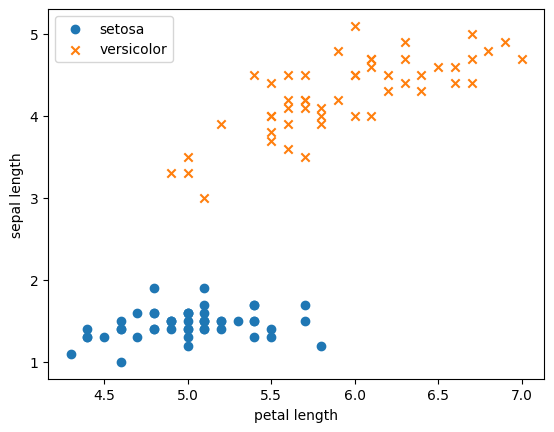

In [ ]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [ ]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]

    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))

    misclassified_ = []

    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0

            delta = (label.item(0,0) - target)

            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)

        misclassified_.append(misclassified)
    return (w, misclassified_)

num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

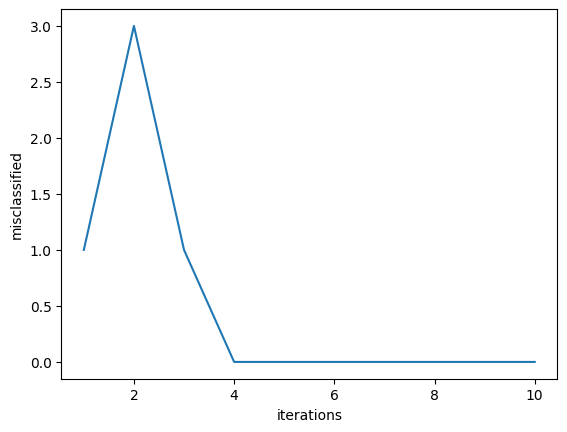

In [ ]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()